In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [3]:
dados = heart_disease.data.features
dados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


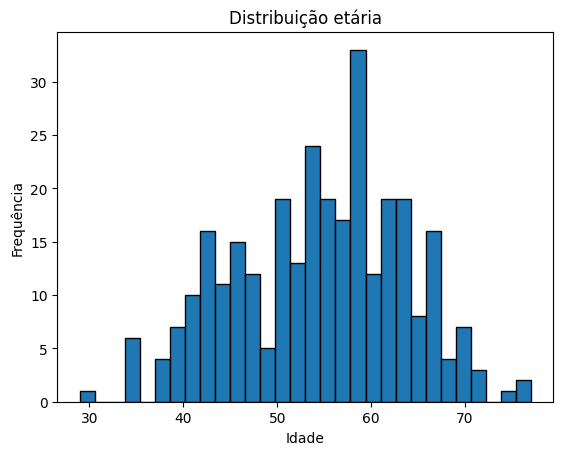

In [7]:
import matplotlib.pyplot as plt

plt.hist(dados['age'], bins = 30, edgecolor = 'black')
plt.title('Distribuição etária')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

In [8]:
dados['doenca'] = 1 * (heart_disease.data.targets > 0) #transformar a coluna target (alvo / variável Y) em binário (0 ou 1)
dados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,doenca
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Text(0, 0.5, 'Idade')

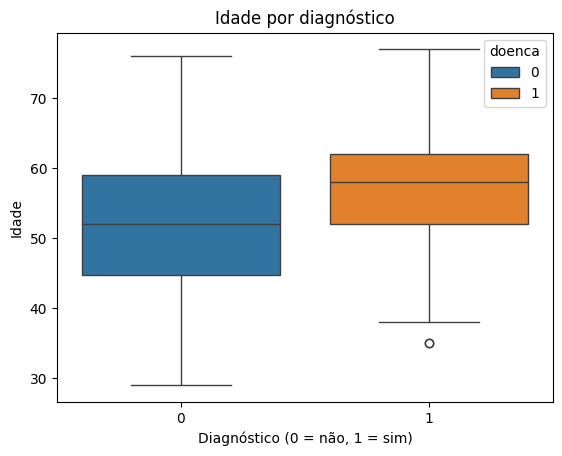

In [11]:
import seaborn as sns

sns.boxplot(x = 'doenca', y = 'age', data = dados, hue = 'doenca')
plt.title('Idade por diagnóstico')
plt.xlabel('Diagnóstico (0 = não, 1 = sim)')
plt.ylabel('Idade')

Saber quais são as features do dataset é fundamental para compreender mais a fundo as informações e os padrões que podem indicar a presença ou ausência de doença cardíaca. Que tal entender mais a fundo as features deste conjunto de dados?

A seguir temos uma explicação sobre cada uma delas:

- age: Idade em anos;
- sex: Sexo biológico (0 = feminino, 1 = masculino);
- cp: Tipo de dor no peito relatada pelo paciente (1= angina típica, 2 = angina atípica, 3 = não angina, 4 = angina assintomática);
- trestbps: Pressão arterial medida em repouso ;
- chol: Nível de colesterol no sangue em miligramas por decilitro (mg/dl);
- fbs: Nível de glicose no sangue em jejum, indicando se está abaixo de 120 mg/dl ou acima de 120 mg/dl (0 = abaixo, 1 = acima);
- restecg: Resultados do eletrocardiograma em repouso (0 = normal, 1 = anormalidade de onda ST-T, 2 = hipertrofia ventricular esquerda);
- thalach: Frequência cardíaca máxima alcançada durante um teste de esforço físico;
- exang: Indica se houve angina (dor no peito) induzida por exercício ou não (0 = sim, 1 = não);
- oldpeak: Medida da depressão do segmento ST induzida pelo exercício em relação ao repouso;
- slope: Inclinação do segmento ST no pico do exercício (1 = inclinado para cima, 2 = plano, 3 = inclinado para baixo);
- ca: Número de vasos sanguíneos principais coloridos durante o procedimento de fluoroscopia;
- thal: Resultado do exame de cintilografia com tálio (3 = normal, 6 = defeito fixo, 7 = defeito reversível);

In [12]:
import plotly.express as px

px.histogram(dados, x = 'age', title = 'Distribuição de idade')

Para gerar esse gráfico podemos usar a IA do Collab também.

In [13]:
import plotly.express as px

px.histogram(dados, x = 'age', title = 'Distribuição de idade')

# Atividade

O desafio é escolher outras duas variáveis do dataset de heart disease e criar gráficos interativos com a biblioteca Plotly para explorar os dados. Use a documentação da biblioteca Plotly Express para selecionar os tipos de gráficos mais adequados para cada variável, considerando a relação de cada uma delas com o target (coluna "doença" do dataframe "dados").

In [16]:
fig_ex = px.box(dados, x = 'doenca', y = 'chol')

fig_ex.update_layout(
    title = 'Colesterol sérico vs Presença de Doença Cardíaca',
    xaxis_title = 'Doença cardíaca',
    yaxis_title = 'Colesterol sérico'
)

fig_ex.show()

In [17]:
# Gráfico de boxplot para Pressão arterial em repouso vs Doença
fig_ex = px.box(dados, x="doenca",  y="trestbps")

fig_ex.update_layout(
    title="Pressão arterial em repouso vs Presença de Doença Cardíaca",
    xaxis_title="Doença cardíaca",
    yaxis_title="Pressão arterial em repouso"
    )

fig_ex.show()